In [1]:
import torch
import sys
import cv2
import numpy as np
import matplotlib.pyplot as plt
from model.Networks import unet 
from matplotlib.colors import ListedColormap
sys.path.append(r"C:/Sen2FireProject/Baseline_code")  
from dataset.Sen2Fire_Dataset import Sen2FireDataSet
from IPython import display
# show plots inline
%matplotlib inline


# **MODE 1**

In [72]:
model_path = r"C:/Sen2FireProject/Baseline_code/Exp/input_all_bands_aerosol/weight_10_time1208_0040/best_model.pth"

model = unet(n_classes=2, n_channels=13)  # example, change if different mode
state = torch.load(model_path, map_location="cpu")
model.load_state_dict(state)
model.eval()


C:\Users\houss\AppData\Local\Temp\ipykernel_12312\3754089006.py:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state = torch.load(model_path, map_location="cpu")


unet(
  (inc): DoubleConv(
    (double_conv): Sequential(
      (0): Conv2d(13, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): ReLU(inplace=True)
    )
  )
  (down1): Down(
    (maxpool_conv): Sequential(
      (0): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (1): DoubleConv(
        (double_conv): Sequential(
          (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
          (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU(inplace=True)
          (3): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
          (4): BatchNorm2d(128, eps=1e-05, momen

In [73]:
sample = np.load(r"C:/Sen2FireProject/Sen2Fire/scene4/scene_4_patch_16_13.npz")

img = sample['image']       # [12,H,W]
aerosol = sample['aerosol'][None,:,:]  # now [1,H,W]
label = sample['label']

# total 13 channels (mode 1)
img13 = np.concatenate([img, aerosol], axis=0)
tensor = torch.from_numpy(img13).unsqueeze(0).float()

with torch.no_grad():
    pred = model(tensor)
pred = torch.softmax(pred,1).argmax(1).squeeze().numpy()


## ***NO FIRE PICTURE***

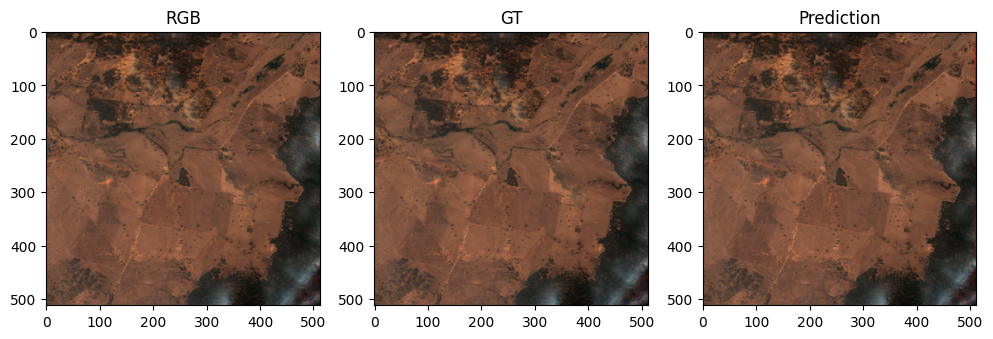

In [74]:
rgb = img[[3,2,1]].transpose(1,2,0) / 1500.0
rgb = rgb.astype(float)
rgb = (rgb - rgb.min()) / (rgb.max() - rgb.min())

cmap = ListedColormap([(0,0,0,0), (1,0,0,0.7)])

plt.figure(figsize=(12,4))
plt.subplot(1,3,1); plt.imshow(rgb); plt.title("RGB")

plt.subplot(1,3,2); plt.imshow(rgb); plt.imshow(label, cmap=cmap); plt.title("GT")

plt.subplot(1,3,3); plt.imshow(rgb); plt.imshow(pred, cmap=cmap); plt.title("Prediction")
plt.show()

In [75]:
import glob

for f in glob.glob("C:/Sen2FireProject/Sen2Fire/scene4/*.npz"):
    s = np.load(f)
    if s['label'].sum() > 10:
        print("patch:", f)
        break


patch: C:/Sen2FireProject/Sen2Fire/scene4\scene_4_patch_10_11.npz


In [86]:
sample_2 = np.load(r"C:/Sen2FireProject/Sen2Fire/scene4/scene_4_patch_10_12.npz")

img_2 = sample_2['image']       # [12,H,W]
aerosol = sample_2['aerosol'][None,:,:]  # now [1,H,W]
label = sample_2['label']

# total 13 channels (mode 1)
img13 = np.concatenate([img_2, aerosol], axis=0)
tensor = torch.from_numpy(img13).unsqueeze(0).float()

with torch.no_grad():
    pred = model(tensor)
pred = torch.softmax(pred,1).argmax(1).squeeze().numpy()


## ***FIRE PICTURE***

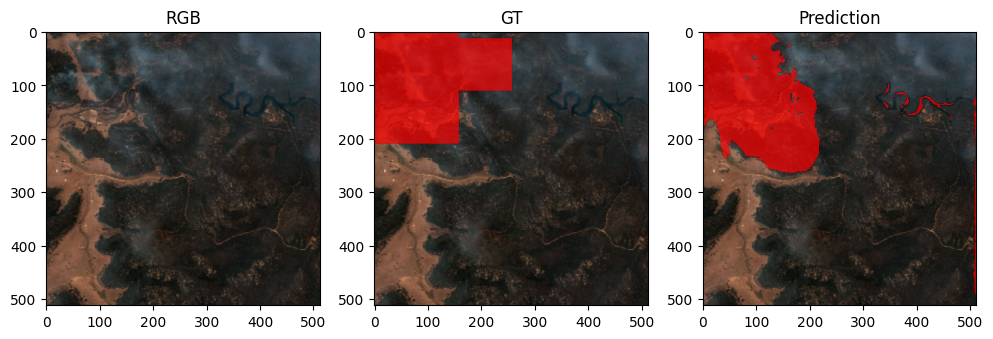

In [87]:
rgb = img_2[[3,2,1]].transpose(1,2,0) / 1500.0
rgb = rgb.astype(float)
rgb = (rgb - rgb.min()) / (rgb.max() - rgb.min())

cmap = ListedColormap([(0,0,0,0), (1,0,0,0.7)])

plt.figure(figsize=(12,4))
plt.subplot(1,3,1); plt.imshow(rgb); plt.title("RGB")

plt.subplot(1,3,2); plt.imshow(rgb); plt.imshow(label, cmap=cmap); plt.title("GT")

plt.subplot(1,3,3); plt.imshow(rgb); plt.imshow(pred, cmap=cmap); plt.title("Prediction")
plt.show()

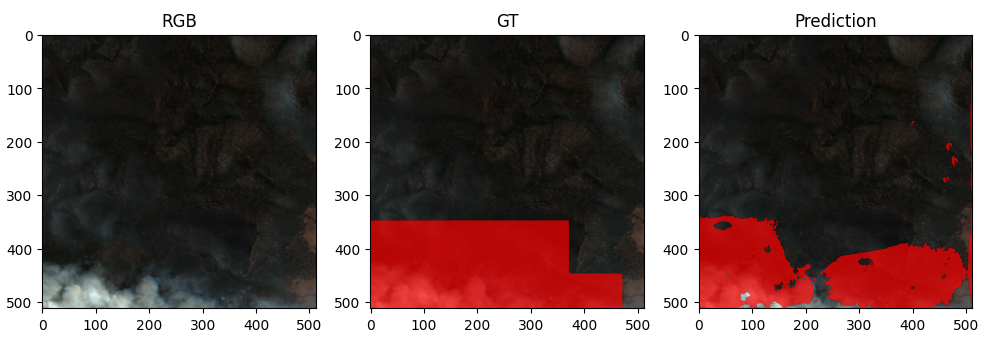

In [2]:
display.Image("results_mode_1_all_13_channels.png")

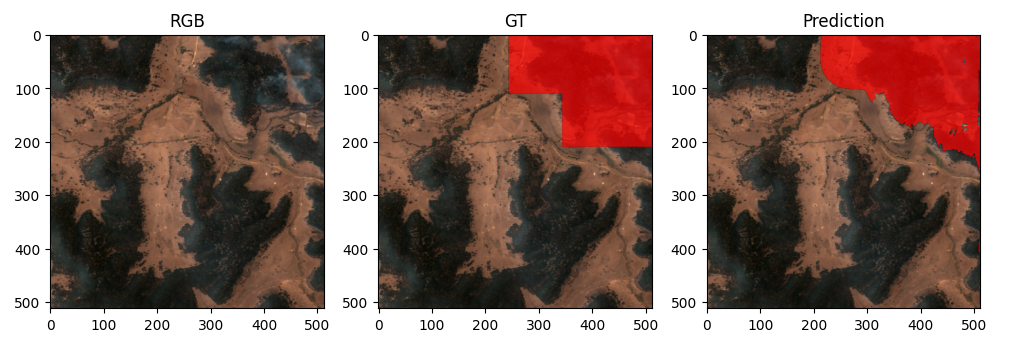

In [4]:
display.Image("results_mode_1_all_13_channelss.png")

## ***MAP RESULTS***

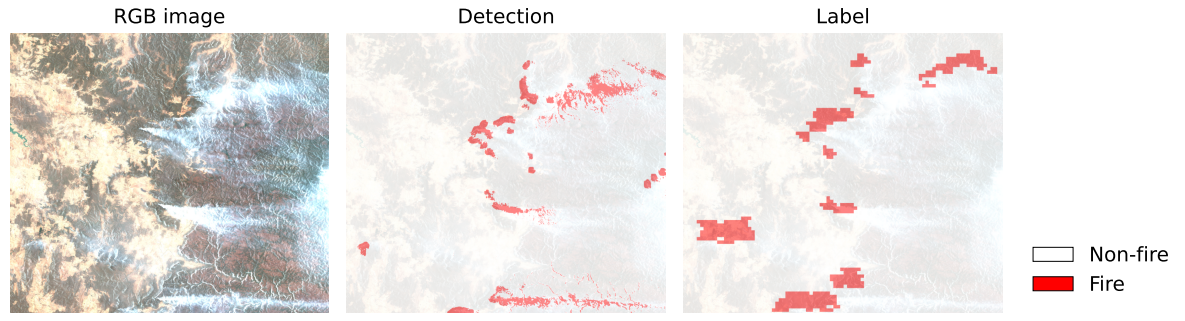

In [8]:
display.Image("Screenshot 2025-12-20 010024.png")